# CSCI 250 Project 1

- **Dataset**: [TMDB 1M Movie Dataset](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies)
- **Description**: The TMDB 1M Movie Dataset contains extensive information on over one million movies, including various attributes such as:

  - **Title**: The title of the movie.
  - **Genres**: The genres associated with each movie.
  - **Adult**: Whether the movie contains adult content.
  - **Vote Average**: The average rating of the movie.
  - **Vote Count**: The total number of votes received.
  - **Revenue**: The total revenue generated by the movie.
  - **Popularity**: The popularity score of the movie.
  - **Runtime**: The duration of the movie in minutes.
  - **Budget**: The budget allocated for the movie production.
  - **Release Date**: The date when the movie was released.
  - **Original Language**: The language in which the movie was originally produced.
  - **Overview**: A brief synopsis of the movie.

- **Problem Statement**
  - The objective of this project is to analyze the defining features of high-grossing movies. 
  - Specifically, we aim to identify the key factors that contribute to a film's financial success based on its attributes. 
  - We will utilize machine learning techniques to uncover patterns and relationships within the data, which can help filmmakers and studios make informed decisions in their production and marketing strategies.

## Imports

In [164]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

## Load Dataset

In [165]:
data = pd.read_csv("Data/TMDB_movie_dataset_v11.csv")
data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [166]:
data.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object

In [167]:
data.shape

(1118946, 24)

## Data Cleaning

In [168]:
data.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             178943
revenue                       0
runtime                       0
adult                         0
backdrop_path            820281
budget                        0
homepage                1000061
imdb_id                  520903
original_language             0
original_title               13
overview                 224676
popularity                    0
poster_path              348987
tagline                  961799
genres                   445636
production_companies     611867
production_countries     492386
spoken_languages         473951
keywords                 813479
dtype: int64

### Null values

#### We are concerned with the revenue so we can drop all samples with no revenue as well as title and release data

In [169]:
data = data.dropna(subset=["revenue", "title", "release_date"])
data = data[data["revenue"] != 0]
data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [170]:
data.shape

(18774, 24)

### Let's drop the columns we won't be using.

In [171]:
data = data.drop(
    columns=[
        "id",
        "imdb_id",
        "tagline",
        "backdrop_path",
        "overview",
        "poster_path",
        "original_title",
        "production_companies",
        "production_countries",
        "status",
        "homepage",
        "popularity",
        "keywords",
        "spoken_languages",
    ]
)
data.head()

,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,genres
0,Inception,8.364,34495,2010-07-15,825532764,148,False,160000000,en,"Action, Science Fiction, Adventure"
1,Interstellar,8.417,32571,2014-11-05,701729206,169,False,165000000,en,"Adventure, Drama, Science Fiction"
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,False,185000000,en,"Drama, Action, Crime, Thriller"
3,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,en,"Action, Adventure, Fantasy, Science Fiction"
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,False,220000000,en,"Science Fiction, Action, Adventure"


### *Release Year*

In [172]:
# Convert the "release_date" column to datetime
data["release_date"] = pd.to_datetime(data["release_date"])

# Replace date with year and rename column
data["release_date"] = data["release_date"].dt.year
data.rename(columns={"release_date": "release_year"}, inplace=True)
data.head()

,title,vote_average,vote_count,release_year,revenue,runtime,adult,budget,original_language,genres
0,Inception,8.364,34495,2010,825532764,148,False,160000000,en,"Action, Science Fiction, Adventure"
1,Interstellar,8.417,32571,2014,701729206,169,False,165000000,en,"Adventure, Drama, Science Fiction"
2,The Dark Knight,8.512,30619,2008,1004558444,152,False,185000000,en,"Drama, Action, Crime, Thriller"
3,Avatar,7.573,29815,2009,2923706026,162,False,237000000,en,"Action, Adventure, Fantasy, Science Fiction"
4,The Avengers,7.710,29166,2012,1518815515,143,False,220000000,en,"Science Fiction, Action, Adventure"


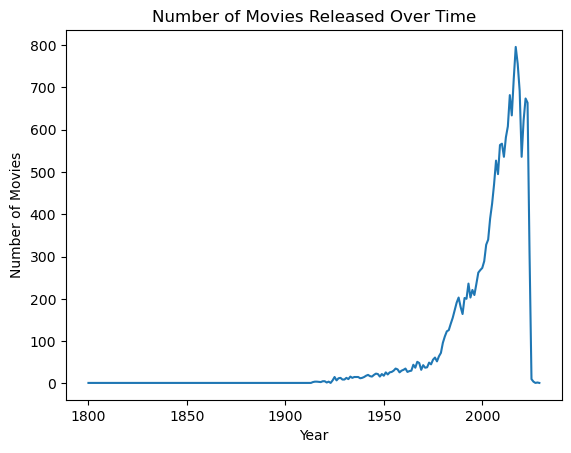

In [173]:
# Plot the number of movies released over time
data["release_year"].value_counts().sort_index().plot(kind="line")
plt.title("Number of Movies Released Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

In [174]:
data["release_year"].describe()

count    18774.000000
mean      2004.371311
std         18.086504
min       1800.000000
25%       1997.000000
50%       2010.000000
75%       2017.000000
max       2029.000000
Name: release_year, dtype: float64

#### **Focusing on the Modern Era (2000–2023)**

Based on the distribution of release years, focusing on the **modern era (2000–2023)** allows us to:
- Capture more **recent trends** in the movie industry, especially with the rise of digital streaming, global releases, and new revenue models.
- Include the most **relevant data** for analyzing current factors that impact movie revenue, such as changes in consumer behavior and technological advancements.
- Avoid potential **outliers** from very early movies (pre-2000) that may not reflect today’s market dynamics or revenue-generating mechanisms.

By narrowing the focus to the modern era, we ensure that our analysis is relevant to **today’s movie industry** while still capturing a significant range of data for meaningful insights.


In [175]:
data = data[(data.release_year >= 2000) & (data.release_year <= 2023)]
data.shape

(13172, 10)

### *Revenue*

In [176]:
data.revenue.describe()

count    1.317200e+04
mean     4.372030e+07
std      1.383908e+08
min     -1.200000e+01
25%      5.000000e+04
50%      1.931088e+06
75%      2.157419e+07
max      3.000000e+09
Name: revenue, dtype: float64

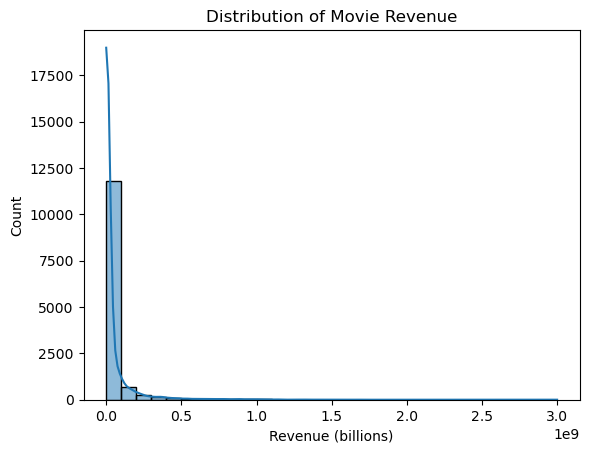

In [177]:
# Revenue distribution
sns.histplot(data["revenue"], bins=30, kde=True)
plt.title("Distribution of Movie Revenue")
plt.xlabel("Revenue (billions)")
plt.show()

In [178]:
# Remove samples with revenue less than $1M
data = data[data['revenue'] > 1_000_000]

### *Runtime* ### 

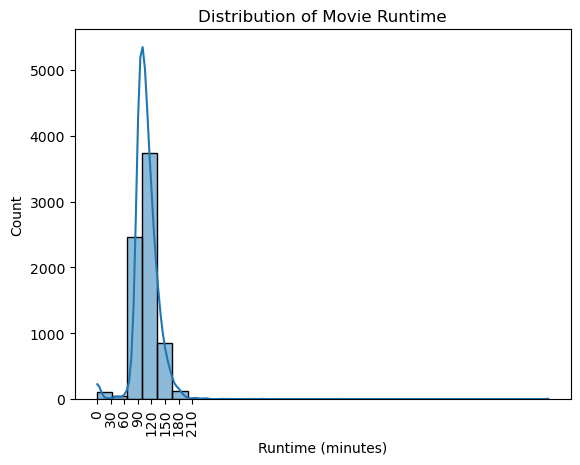

In [179]:
# Runtime distribution
sns.histplot(data["runtime"], bins=30, kde=True)
plt.title("Distribution of Movie Runtime")
plt.xlabel("Runtime (minutes)")
plt.xticks(ticks=range(0, 240, 30), rotation=90)
plt.show()

In [180]:
# Descriptive Stats
data["runtime"].describe()

count    7366.000000
mean      109.248303
std        29.945574
min         0.000000
25%        95.000000
50%       106.000000
75%       121.000000
max       999.000000
Name: runtime, dtype: float64

To remove outliers and data errors, we will:
- Exclude movies with runtimes of **0 minutes** or **999 minutes**.
- Focus on a **runtime range between 60 and 180 minutes**, covering typical feature-length films that are most likely to generate significant revenue.

In [181]:
data = data[(data["runtime"] >= 60) & (data["runtime"] <= 180)]

In [182]:
data.shape

(7174, 10)

### *Original Language*

In [183]:
data.original_language.describe()

count     7174
unique      56
top         en
freq      4426
Name: original_language, dtype: object

#### Since English accounts for most of the dataset, we will drop all other languages and only use English.

In [184]:
data = data[data['original_language'] == "en"]
data = data.drop(columns=['original_language'])
data.head()

,title,vote_average,vote_count,release_year,revenue,runtime,adult,budget,genres
0,Inception,8.364,34495,2010,825532764,148,False,160000000,"Action, Science Fiction, Adventure"
1,Interstellar,8.417,32571,2014,701729206,169,False,165000000,"Adventure, Drama, Science Fiction"
2,The Dark Knight,8.512,30619,2008,1004558444,152,False,185000000,"Drama, Action, Crime, Thriller"
3,Avatar,7.573,29815,2009,2923706026,162,False,237000000,"Action, Adventure, Fantasy, Science Fiction"
4,The Avengers,7.710,29166,2012,1518815515,143,False,220000000,"Science Fiction, Action, Adventure"


In [185]:
data.shape

(4426, 9)

### *Adult - Do we need it?*

In [186]:
len(data[data.adult == 1])

1

In [187]:
data = data.drop(columns=["adult"])

### *Vote Counts - How many are enough?*

In [188]:
data.describe()

,vote_average,vote_count,release_year,revenue,runtime,budget
count,4426.000000,4426.000000,4426.000000,4.426000e+03,4426.000000,4.426000e+03
mean,6.372729,2523.278807,2011.031857,1.097908e+08,107.360145,3.790641e+07
std,0.995278,3672.184082,6.299789,2.014090e+08,17.590829,4.858941e+07
min,0.000000,0.000000,2000.000000,1.001034e+06,60.000000,0.000000e+00
25%,5.905000,408.000000,2006.000000,8.205534e+06,95.000000,5.000000e+06
50%,6.424000,1169.500000,2011.000000,3.607677e+07,104.000000,2.000000e+07
75%,6.963000,3046.000000,2016.000000,1.156488e+08,117.000000,5.000000e+07
max,10.000000,34495.000000,2023.000000,2.923706e+09,180.000000,3.790000e+08


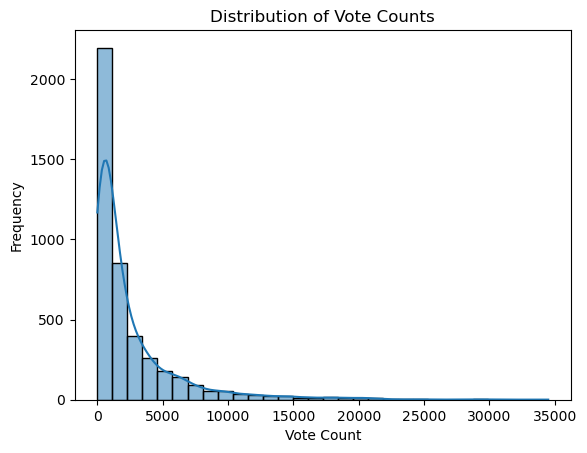

In [189]:
sns.histplot(data["vote_count"], bins=30, kde=True)
plt.title("Distribution of Vote Counts")
plt.xlabel("Vote Count")
plt.ylabel("Frequency")
plt.show()

In [190]:
len(data[data.vote_count < 30])

167

#### **Choosing a Vote Count Threshold**

For our analysis, we will use a vote count threshold of 30. This threshold is chosen based on the following considerations:

- **Central Limit Theorem (CLT):** Setting a threshold of 30 helps ensure we include movies that have sufficient audience engagement, providing a more stable average rating for correlation analysis with revenue.
- **Statistical Reasoning:** This threshold balances the exclusion of titles with very few votes—likely skewing the ratings—while retaining a significant portion of the dataset for robust analysis.

In deciding on a vote count threshold of 30, we opted to reference the Central Limit Theorem (CLT) rather than solely relying on descriptive statistics for several key reasons but mainly because of the following:

- **Avoiding Misinterpretation of Descriptive Statistics:** While descriptive statistics like the mean, median, and percentiles provide valuable insights into the dataset, they can sometimes mislead decision-making. For instance, the mean is heavily influenced by outliers, such as movies with exceptionally high vote counts. Relying solely on descriptive stats may not capture the underlying patterns effectively, especially when the distribution is skewed.

In [191]:
data = data[data["vote_count"] >= 30]
data.shape

(4259, 8)

### *Budget*

##### Let's drop the rows with no reported budget

In [192]:
len(data[data.budget == 0])

591

In [193]:
data = data[data.budget != 0]
data.shape

(3668, 8)

## Exploratory Data Analysis (EDA)

### *Genres*

#### First, let's get all the unique genres in the dataset

In [194]:
# Split the genres and create a list of all genres
all_genres = data["genres"].str.cat(sep=",").split(",")

# Strip any leading/trailing whitespace and get unique genres
unique_genres = list(set(genre.strip() for genre in all_genres))
unique_genres

['Thriller',
 'Crime',
 'History',
 'Romance',
 'Animation',
 'War',
 'Adventure',
 'Mystery',
 'Comedy',
 'Family',
 'Action',
 'Fantasy',
 'Documentary',
 'Music',
 'Drama',
 'Science Fiction',
 'Western',
 'Horror',
 'TV Movie']

#### Let's visualize the count of movies per genre

In [195]:
# Split the genres by comma, and use explode to create separate rows for each genre
data["genres"] = data["genres"].str.split(",")
data = data.explode("genres")
data["genres"] = data["genres"].str.strip() # Remove whitespace
data.head(10)

,title,vote_average,vote_count,release_year,revenue,runtime,budget,genres
0,Inception,8.364,34495,2010,825532764,148,160000000,Action
0,Inception,8.364,34495,2010,825532764,148,160000000,Science Fiction
0,Inception,8.364,34495,2010,825532764,148,160000000,Adventure
1,Interstellar,8.417,32571,2014,701729206,169,165000000,Adventure
1,Interstellar,8.417,32571,2014,701729206,169,165000000,Drama
1,Interstellar,8.417,32571,2014,701729206,169,165000000,Science Fiction
2,The Dark Knight,8.512,30619,2008,1004558444,152,185000000,Drama
2,The Dark Knight,8.512,30619,2008,1004558444,152,185000000,Action
2,The Dark Knight,8.512,30619,2008,1004558444,152,185000000,Crime
2,The Dark Knight,8.512,30619,2008,1004558444,152,185000000,Thriller


In [196]:
genre_counts = data["genres"].value_counts()
genre_counts

genres
Drama              1566
Comedy             1335
Thriller           1035
Action              989
Adventure           768
Romance             638
Crime               562
Family              472
Horror              451
Science Fiction     428
Fantasy             416
Mystery             359
Animation           270
History             179
Music               129
War                  96
Documentary          44
Western              37
TV Movie              4
Name: count, dtype: int64

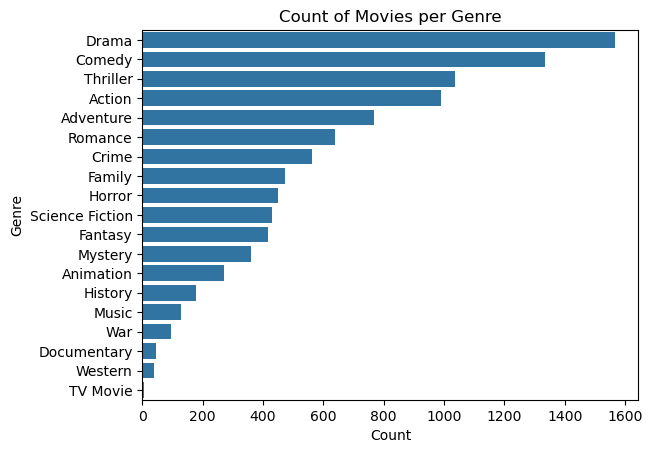

In [197]:
# Create count plot
sns.countplot(
    y= "genres", data=data, order=genre_counts.index
)
plt.title("Count of Movies per Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

### Correlations

In [198]:
data.dtypes

title            object
vote_average    float64
vote_count        int64
release_year      int32
revenue           int64
runtime           int64
budget            int64
genres           object
dtype: object

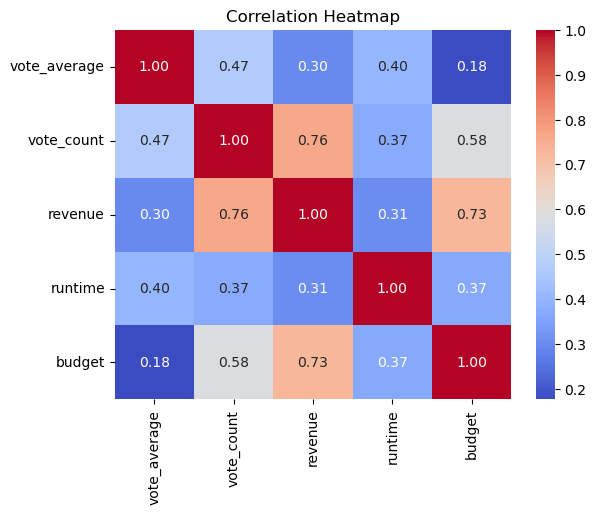

In [199]:
# Correlation heatmap
numeric_data = data.select_dtypes(
    include=[
        "float64",
        "int64",
    ]
)
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Key Observations from the Correlation Matrix:

- **Vote Count and Revenue (0.76)**: There is a strong positive correlation between the number of votes a movie receives and its revenue, suggesting that movies with higher revenue tend to be more popular.

- **Budget and Revenue (0.73)**: A strong positive correlation exists between budget and revenue, suggesting that higher-budget movies are likely to generate higher revenues.
  
- **Runtime and Revenue (0.31)**: A weak positive correlation is observed between runtime and revenue, suggesting that runtime is not a significant predictor of revenue.

- **Vote Average and Revenue (0.30)**: There is a weak positive correlation between the average rating of a movie and its revenue, indicating that better-rated films may not necessarily generate more revenue.

## Machine Learning

- We will be using **K-Nearest Neighbor** to attempt to identify if movies that have similar characteristics have similar revenues. We have chsoen KNN as we know the features of the dataset and thus chose to use a supervised model for machine learning.
- We will then attempt to use a regression model to fit the data along a curve and attempt to identify the key features that are predicitve of a movies success and potentially the most influencial factor.
- We will use 2 different regression models to see which best fits the data linear and quadratic.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Linear Regression MSE: 1.371940895006008e+16
Linear Regression RMSE: 117129880.68832001
Quadratic Regression MSE: 1.2988149636368262e+16
Quadratic Regression RMSE: 113965563.37933078


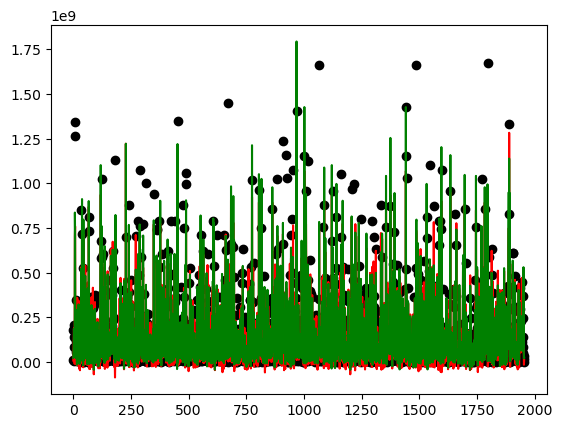

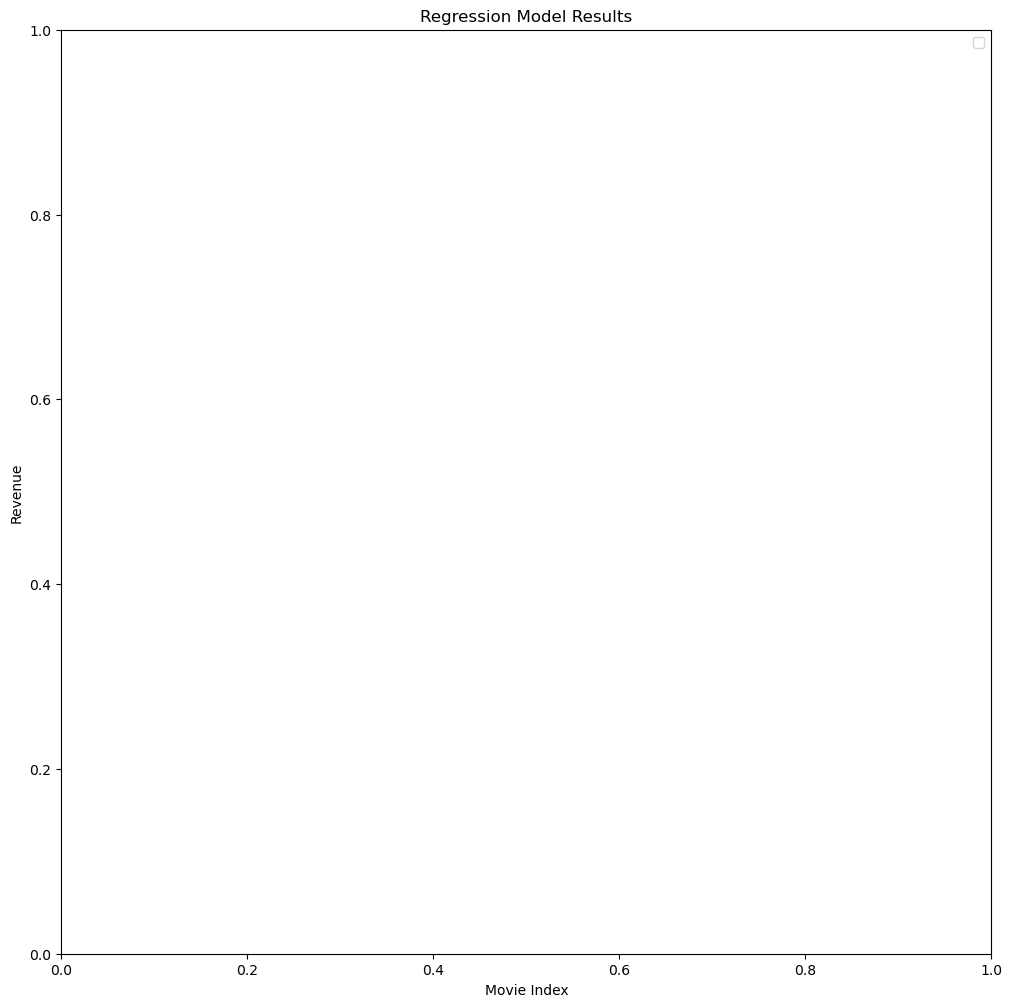

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Splitting the data into features (X) and target (y)
x = data.drop(columns=["revenue", "title", "genres"])
y = data["revenue"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 20)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting the revenue results using linear regression
y_pred_lin = lin_reg.predict(X_test)

# Root Mean squared error (RMSE) and Mean squared Error for linear regression
mse_linear = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_linear}")
rmse_linear = np.sqrt(mse_linear)
print(f"Linear Regression RMSE: {rmse_linear}")

# Polynomial (Quadratic) Regression
poly_features = PolynomialFeatures(degree=2)  # for quadratic, use degree=2
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train a new linear regression on the expanded features
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Predictions with the quadratic model
y_pred_poly = poly_reg.predict(X_poly_test)

# Printing the Root Mean squared error (RMSE) and the Mean Squared error for quadratic regression
mse_quadratic = mean_squared_error(y_test, y_pred_poly)
print(f"Quadratic Regression MSE: {mse_quadratic}")
rmse_quadratic = np.sqrt(mse_quadratic)
print(f"Quadratic Regression RMSE: {rmse_quadratic}")

# Visualizing the regression results
plt.figure(figsize=(12, 12))

plt.scatter(range(len(y_test)), y_test, color="black", label="True Revenue")
plt.plot(range(len(y_test)), y_pred_lin, color="red", label="Linear Fit")
plt.plot(range(len(y_test)), y_pred_poly, color="green", label="Quadratic Fit")

# Creating the labels for the graph
plt.xlabel("Movie Index")
plt.ylabel("Revenue")
plt.title("Regression Model Results")
plt.legend()
plt.show()


### The model did not perform as well as we would have liked it to for several reasons
- The data is hard to read which is lilely due to the large data set that we are using
his could the due to the fact that we have not applied any clustering/ classfying technique to the data as of yet. 
- The factors that we have in the dataset may not be predictive of the revenue that a movie makes.

### Trying to fix this
- Thus we will now attempt to use K-nearest neighbor regression as a way of improving the score of the Regression model. 

### Preprocessing the data for KNN

- We will be preprocessing the data so that KNN can be applied effectively 
- Due to KNN needing numeric data types , we will be converting the movie genres to numbers 
- Scaling the dat will the the first step
- The data will the be split into train and test subsets
- KNN regressor will then be applied to the data to see if we can get a better score 

In [201]:
# Ensuring that the String data does not compromise the KNN method
data = pd.get_dummies(data, columns=["genres"], prefix="genre")

# Separating the data into the movie features and the revenue

features = data.drop(columns=["revenue", "title"], axis=1)  
revenue_generated = data["revenue"] 

from sklearn.model_selection import train_test_split

# Spliting data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(features, revenue_generated, test_size=0.25, random_state = 20)

print(features.head())  
print(features.dtypes) 


   vote_average  vote_count  release_year  runtime     budget  genre_Action  \
0         8.364       34495          2010      148  160000000          True   
0         8.364       34495          2010      148  160000000         False   
0         8.364       34495          2010      148  160000000         False   
1         8.417       32571          2014      169  165000000         False   
1         8.417       32571          2014      169  165000000         False   

   genre_Adventure  genre_Animation  genre_Comedy  genre_Crime  ...  \
0            False            False         False        False  ...   
0            False            False         False        False  ...   
0             True            False         False        False  ...   
1             True            False         False        False  ...   
1            False            False         False        False  ...   

   genre_History  genre_Horror  genre_Music  genre_Mystery  genre_Romance  \
0          False     

### An issue with KNN!

- When we tried to run KNN without the **get_dummies** function, we encountered an error while trying to process the titles and genres.
- KNN can only apply its clustering alogrithm on numeric data types.
- Thus the "Title" column was dropped (as it is a string) and the genres column will be converted to numbers with each number representing a different genre.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KNN Regression MSE: 1.5714577483381048e+16
KNN Regression RMSE: 125357797.8563003


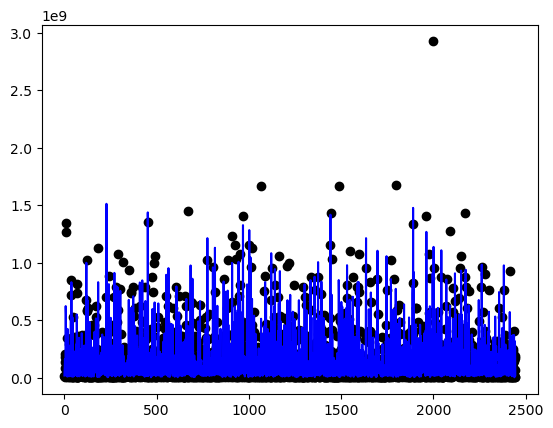

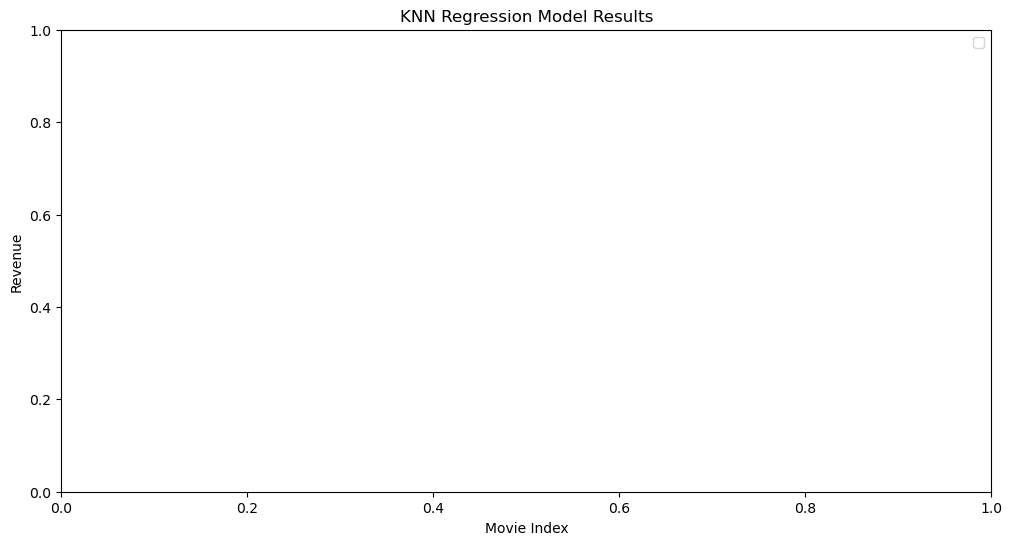

In [202]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# More preprocessing of the data
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors = 6)  
knn_regressor.fit(X_train_scaled, y_train)

# Making predictions for the data using KNN
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Mean squared error for KNN regression
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Regression MSE: {mse_knn}")

# Root mean squared error (RMSE) for KNN regression
rmse_knn = np.sqrt(mse_knn)
print(f"KNN Regression RMSE: {rmse_knn}")

# Visualizing the regression results
plt.scatter(range(len(y_test)), y_test, color = "black", label = "True Revenue")
plt.plot(range(len(y_test)), y_pred_knn, color = "blue", label = "KNN Fit")

# Creating the labels for the raph
plt.xlabel("Movie Index")
plt.ylabel("Revenue")
plt.title("KNN Regression Model Results")
plt.legend()
plt.show()


### What Do We See

- KNN Performance: The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for the KNN regression model are similar. This indicates that the KNN algorithm did not significantly alter the predictions compared to the baseline performance. In other words, the distance-based approach of KNN did not lead to substantial improvements in accuracy or error reduction when estimating movie revenue. This could suggest that the underlying relationships in the data may not be highly complex or nonlinear, making simpler models sufficient for prediction.

- Scatter Plot Interpretation: The scatter plot visualizing the true revenues against the predicted revenues using KNN appears cluttered and difficult to interpret. This can hinder the ability to assess how well the model is performing across different revenue ranges. Ideally, a clearer visualization would allow us to observe trends and distribution patterns in the predictions. Alternative visualization techniques, such as residual plots or density plots, could provide more insights into how the model predictions relate to the actual revenues.

### Why 6 Classifiers?

- The Number of Classifiers was chosen based on the features that we choise to include in determining the reason for reveneue sources.
The choice of using six classifiers in this analysis corresponds to the number of features or factors utilized to predict movie revenue. Each classifier leverages specific aspects of the dataset that may influence revenue generation. These factors could include:



### Conclusions

- In summary, while the KNN model showed similar performance metrics to simpler models, the choice of using six classifiers was strategic in capturing the multifactorial nature of movie revenue prediction. Improving visualization methods and further exploring the relationships among features could enhance our understanding and lead to more effective modeling approaches in future analyses.
- This suggests that either a different method for data classifying /  clustering might have produced better results for the regression line. Moreover maybe linear and quadtratic regression were not the best ways for trying to visualise the data especially with the large data set of movies that we were working with
- The high RMSE values for the data also suggests that the factors that were i the data set were not enough to predict how much money a movie would make. thi makes sense as a lot goes into a movie's success such as director skil, movie direction, genre, trending genres at that time, economic factors that may lead to movies and streaming sites earning less/ more money during any given period of time. Thus, the popularity, genresand the other factors chosen ,were likely not enough to predict the revenur outcome of the movies. 